In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 我们把max_depth设为1就当作我们的一个简单的分类器Gm(x)
import matplotlib.pyplot as plt
%matplotlib inline

# Boost

“装袋”（bagging）和“提升”（boost）是构建组合模型的两种最主要的方法，所谓的组合模型是由多个基本模型构成的模型，组合模型的预测效果往往比任意一个基本模型的效果都要好。

- 装袋：每个基本模型由从总体样本中随机抽样得到的不同数据集进行训练得到，通过重抽样得到不同训练数据集的过程称为装袋。

- 提升：每个基本模型训练时的数据集采用不同权重，针对上一个基本模型分类错误的样本增加权重，使得新的模型重点关注误分类样本

### AdaBoost

AdaBoost是AdaptiveBoost的缩写，表明该算法是具有适应性的提升算法。

算法的步骤如下：

1）给每个训练样本（$x_{1},x_{2},….,x_{N}$）分配权重，初始权重$w_{1}$均为1/N。

2）针对带有权值的样本进行训练，得到模型$G_m$（初始模型为G1）。

3）计算模型$G_m$的误分率$e_m=\sum_{i=1}^Nw_iI(y_i\not= G_m(x_i))$

4）计算模型$G_m$的系数$\alpha_m=0.5\log[(1-e_m)/e_m]$

5）根据误分率e和当前权重向量$w_m$更新权重向量$w_{m+1}$。

6）计算组合模型$f(x)=\sum_{m=1}^M\alpha_mG_m(x_i)$的误分率。

7）当组合模型的误分率或迭代次数低于一定阈值，停止迭代；否则，回到步骤2）

In [2]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 下面就是：首先：我们要创建我们的数据：
# def create_data():
iris = load_iris()
data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
data['labels'] = iris.target
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width',"target_name"]
# 下面就是我们只留两个特征！！！
data = np.array(data.iloc[:100, [0,1,-1]])

# 下面就是建构我们的3类变成两类：
for i in range(len(data)):
    if data[i,-1] == 0:
        data[i,-1]== -1     
data

array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.1, 0. ],
       [5. , 3.6, 0. ],
       [5.4, 3.9, 0. ],
       [4.6, 3.4, 0. ],
       [5. , 3.4, 0. ],
       [4.4, 2.9, 0. ],
       [4.9, 3.1, 0. ],
       [5.4, 3.7, 0. ],
       [4.8, 3.4, 0. ],
       [4.8, 3. , 0. ],
       [4.3, 3. , 0. ],
       [5.8, 4. , 0. ],
       [5.7, 4.4, 0. ],
       [5.4, 3.9, 0. ],
       [5.1, 3.5, 0. ],
       [5.7, 3.8, 0. ],
       [5.1, 3.8, 0. ],
       [5.4, 3.4, 0. ],
       [5.1, 3.7, 0. ],
       [4.6, 3.6, 0. ],
       [5.1, 3.3, 0. ],
       [4.8, 3.4, 0. ],
       [5. , 3. , 0. ],
       [5. , 3.4, 0. ],
       [5.2, 3.5, 0. ],
       [5.2, 3.4, 0. ],
       [4.7, 3.2, 0. ],
       [4.8, 3.1, 0. ],
       [5.4, 3.4, 0. ],
       [5.2, 4.1, 0. ],
       [5.5, 4.2, 0. ],
       [4.9, 3.1, 0. ],
       [5. , 3.2, 0. ],
       [5.5, 3.5, 0. ],
       [4.9, 3.6, 0. ],
       [4.4, 3. , 0. ],
       [5.1, 3.4, 0. ],
       [5. , 3.5, 0. ],
       [4.5, 2.3

In [4]:
# 下面就是划分我们的x：
x = data[:,:2]
# 左闭右开！！！
y = data[:,-1]
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
# 下面就是将我们的x和y分成训练集和测试集：
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

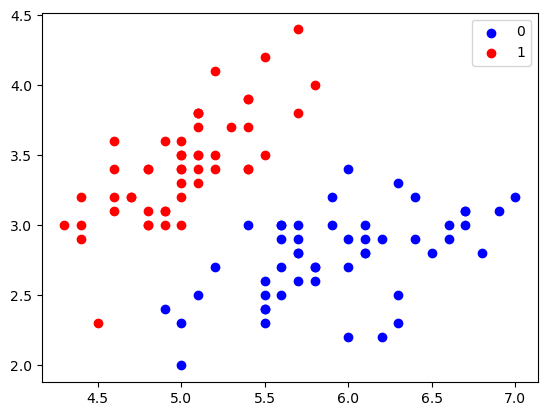

In [6]:
# 下面就是我们把我们的数据画出来看一下：
plt.scatter(x[y == 1][:,0], x[y==1][:,1],c = 'blue',label = '0')
plt.scatter(x[y==0][:,0],x[y==0][:,1], c= 'red', label ='1')
plt.legend()

In [7]:
# 我们设置我们的简单的分类器：
# 首先是实例化！！！

weak_cla = DecisionTreeClassifier(max_depth =1, criterion= "entropy")
weak_cla.fit(x_train, y_train)
score = weak_cla.score(x_test,y_test)
score

0.9

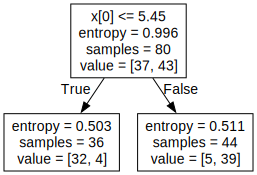

In [8]:
import graphviz
from sklearn import tree
tree_data = tree.export_graphviz(weak_cla)
graph = graphviz.Source(tree_data)
graph

In [9]:
weak_cla.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [10]:
p = weak_cla.predict(x_train)
p

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.])

In [11]:
score = weak_cla.score(x_test, y_test)
score

0.9

In [12]:
data.shape

(100, 3)

In [13]:
np.ones(12)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
np.array([[1],[2]])*np.array([1,2])

array([[1, 2],
       [2, 4]])

# 上面是我们的单个分类器的下效果：我们下面就是我们的集成学习的adaboost：

In [15]:
class Adaboost: # 没有继承！！！不用加任何括号！！！别和神经网络搞混了！！！
    def __init__(self, num_cls = 5): # 我们下面就是我们的构造方法！！！我们的弱分类器的个数我们的初始化默认设为100
        self.num_cls = num_cls
    
    def init_arg(self, x, y): # 下面就是我们的构造我们的参数的过程！！！
        # 我们把我们的x和y传进我们的这个类里面：
        self.x = x
        self.y = y
        
        # 首先是我们的初始化我们的参数：首先是对于我们的每个样本的权重参数！！1
        # 我们的每个参数设置成一样的就行了！！！！我们的参数是一个由样本个数为长度的一个向量！！！
        self.weight = np.ones(x.shape[0])/x.shape[0]
        
        # 下面就是我们的装弱分类器单体的列表：
        self.clfs = []
        # 下面就是我们的每个分类的权重矩阵
        self.alphas = []
    
    
    # 下面就是我们的训练的过程：
    def fit(self, x, y):
        # 首先我们先初始化我们的参数：
        self.init_arg(x, y)
        
        # 下面就是我们的遍历我们的全部所有分类器的过程：【我们已经设置好了我们的分类器就是100个！！！】
        # 我们倒是乘权重再累加的项数就是一百项！！！
        # 我们到时候的各个分类器权重就是有100个！！！【和书上的“误差小于某个值就停止不一样！！！”】
        # 【所以】我们下面以生成的弱分类器的个数来停止我们的循环，训练过程中，我们不做权重与弱分类器对应相乘再求和，
        # 再来求误差的操作！！！
        for m in range(self.num_cls):
            
            # 首先是构造我们的弱分类器：
            clf = DecisionTreeClassifier(max_depth=1)
            
            # 然后：我们拿我们的弱分类器去训练我们的数据；
            # 【注意！！！】下面加个sample_weight = self.weight就是可以体现我们的分类器更加
            # 对于我们的分错的数据更加专注【真的把各个数据的权重读进去了！！！】
            # 书上的例子体现的不明显！！！直接选的分类器，但是我们复现的时候要体现！！！
            # 【我们下次生成的弱分类器就【自然去】会有限去处理我们的权重高（上次分错类）的数据！！！】
            clf.fit(x, y, sample_weight= self.weight)
            
            # 下面我们就是要得到我们的当前（参考了我们的各个样本的本次循环时的权重）
            # 生成的弱分类器的学习误差率：【这个学习误差率可以算出我们的权重】
            # 我们现在先要预测出我们的x数据：
            p = clf.predict(x) 
            # 我们现在的【p和y都是一样长度的【列】向量了】！！！因为我们的x每个样本是按照列来排序的！！！
            # 下面我们就可以得到我们的分类误差率了【直接矩阵相乘！！！】
            em = np.dot(self.weight, (p!=y))
            
            
            # 下面我们就可以将我们的【对应分类器的权重】alpha求出来了【我们的alphas列表是一个M（这里是num_cls）维的行向量】
            # 我们的alpha是一个数！！！我们每生成一个弱分类器就算一次！！！
            # 我们的weight视频一个向量！！！！我们每次算完一个新的弱分类器就更新一次
            alpha = 1/2*np.log((1-em)/em)
            
            
            # 下面我们就可以更新我们的权重了：
            # 首先是规范化因子（用于归一化）【使得我们的每个分类器的权重矩阵的和都为1！！！】
            # 【注意！！！】我们的alpha这时候是一个常数！！！
            # 我们的这里的这个y乘p是对应元素对应相乘！！！
            Z_m = sum(self.weight * np.exp(-alpha * y *p))
            self.weight = self.weight * np.exp(-alpha * y *p)/Z_m
            
            
            # 下面就是将我们算出来的各个分类器的权重和各个分类器记载在两个列表中就行了：
            self.alphas.append(alpha)
            self.clfs.append(clf)
            
        return 'DONE' # 我们已经生成完num_clf个弱分类器了，也找到num_clf个权重
    
    # 下面就是我们的总模型预测我们的标签的过程：
    def predict(self, x):
        # 就是我们拿一部分训练集样本出来：我们要可以做出预测
        len1 = x.shape[0]
        
        # 接下来就是初始化我们的对这len1个数据的分别的预测的数组
        pre_f_sum_x = np.zeros(len1)
        
        # 【注意！！！】我们的adaboost的弱分类器本质上是在训练数据上通过优势结合：
        # 【从而】达到完美的划分效果！！！所以输入给我们adaboost的训练数据一定是多条的！！！【也没什么并行计算！！！】
        # 【所以注意！！！】我们这里可以是只输入进来一个x数据，更可以是输入进来【好几条数据】
        # 【最终奥义！！！】我们是将多个弱分类器化为了一个大的分类器！！！我们可以当作一个分类器来看！！！
        # 当作一个大的分类器就和最开始的初始化一个分类器的看的方法是一样的了！！！
        # 我们这个这个弱分类器是决策树！！！我们总的分类器就可以当作一个大的决策树！！！
        # 本来就是对多条数据来划分的！！！（不是回归。。。） 
        # 当然：我们这个决策树已经训练好了，一条数据也可以找到分到的类
        # 下面我们开始做加和：
        for alpha,clf in zip(self.alphas, self.clfs):
            pre_f_sum_x  += alpha * clf.predict(x)
        
        # 返回值别忘了
        return np.sign(pre_f_sum_x)
        
    # 下面就是找到我们的得分！！！
    def score(self, xtest, ytest):
        pre = self.predict(xtest) # 注意！！！我们的这个pre数组和我们的ytest是同一个形状的！！！
        sum_right = sum(pre == ytest)
        return sum_right/(xtest.shape[0]) # 我们这样就找到了我们的正确率！！！【在测试集中】
    
    def different_weights(self):
        # 我们还可以返回我们的权重：
        return self.weight,self.alphas,self.clfs

In [16]:
len(x_test)

20

In [17]:
adaboost1 = Adaboost(num_cls=100)
adaboost1.fit(x_train,y_train)

'DONE'

In [18]:
adaboost1.predict(x_test)

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1.])

In [19]:
len(adaboost1.predict(x_test))

20

In [20]:
，

1.0

In [21]:
adaboost1.different_weights()

(array([2.54617786e-02, 2.54617786e-02, 1.17360235e-04, 3.01040404e-03,
        3.48628851e-03, 2.54617786e-02, 2.54617786e-02, 2.84438241e-04,
        2.54617786e-02, 2.54617786e-02, 2.54617786e-02, 2.84438241e-04,
        2.54617786e-02, 3.36297807e-05, 3.48628851e-03, 2.54617786e-02,
        4.12191826e-04, 3.36297807e-05, 2.54617786e-02, 2.54617786e-02,
        2.54617786e-02, 2.54617786e-02, 1.17360235e-04, 2.54617786e-02,
        2.54617786e-02, 2.54617786e-02, 4.12191826e-04, 2.84438241e-04,
        2.54617786e-02, 4.12191826e-04, 3.36297807e-05, 2.54617786e-02,
        2.84438241e-04, 3.01040404e-03, 2.84438241e-04, 2.54617786e-02,
        3.36297807e-05, 2.54617786e-02, 4.12191826e-04, 2.84438241e-04,
        2.54617786e-02, 2.84438241e-04, 2.54617786e-02, 2.54617786e-02,
        2.84438241e-04, 2.54617786e-02, 2.54617786e-02, 2.54617786e-02,
        1.17360235e-04, 1.17360235e-04, 2.54617786e-02, 3.01040404e-03,
        2.84438241e-04, 2.54617786e-02, 1.43845510e-03, 2.546177

# sklearn.ensemble.AdaBoostClassifier

- algorithm：这个参数只有AdaBoostClassifier有。主要原因是scikit-learn实现了两种Adaboost分类算法，SAMME和SAMME.R。两者的主要区别是弱学习器权重的度量，SAMME使用了和我们的原理篇里二元分类Adaboost算法的扩展，即用对样本集分类效果作为弱学习器权重，而SAMME.R使用了对样本集分类的预测概率大小来作为弱学习器权重。由于SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifier的默认算法algorithm的值也是SAMME.R。我们一般使用默认的SAMME.R就够了，但是要注意的是使用了SAMME.R， 则弱分类学习器参数base_estimator必须限制使用支持概率预测的分类器。SAMME算法则没有这个限制。

- n_estimators： AdaBoostClassifier和AdaBoostRegressor都有，就是我们的弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是50。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。

-  learning_rate:  AdaBoostClassifier和AdaBoostRegressor都有，即每个弱学习器的权重缩减系数ν

- base_estimator：AdaBoostClassifier和AdaBoostRegressor都有，即我们的弱分类学习器或者弱回归学习器。理论上可以选择任何一个分类或者回归学习器，不过需要支持样本权重。我们常用的一般是CART决策树或者神经网络MLP。

In [22]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100)

In [23]:
clf.score(x_test, y_test)

1.0